In [1]:
import pandas as pd
import numpy as np

In [30]:
np.random.seed(0)


miles_per_week = np.random.normal(
    loc=55, scale=10, size=500
)  # mean=55, stddev=10, and 500 samples
miles_per_week = np.clip(miles_per_week, 30, 120)
miles_per_week = np.round(miles_per_week).astype(int)


farthest_run = np.random.normal(
    loc=18, scale=3, size=500
)  # mean=55, stddev=10, and 500 samples
farthest_run = np.clip(farthest_run, 12, 26)
farthest_run = np.round(farthest_run).astype(int)

qualified_boston_marathon = np.random.randint(2, size=500)
qualified_boston_marathon[miles_per_week > 55] = 1


data = {
    "miles_per_week": miles_per_week,
    "farthest_run": farthest_run,
    "qualified_boston_marathon": qualified_boston_marathon,
}

df = pd.DataFrame(data)

In [32]:
df

,miles_per_week,farthest_run,qualified_boston_marathon
0,73,19,1
1,59,18,1
2,65,21,1
3,77,17,1
4,74,17,1
...,...,...,...
495,54,19,1
496,48,17,0
497,50,18,0
498,45,15,1


In [33]:
df.describe().round(3)

,miles_per_week,farthest_run,qualified_boston_marathon
count,500.000,500.000,500.000
mean,54.774,17.820,0.752
std,9.960,2.868,0.432
min,30.000,12.000,0.000
25%,48.000,16.000,1.000
50%,54.500,18.000,1.000
75%,62.000,20.000,1.000
max,82.000,26.000,1.000


In [34]:
X = df.drop(columns=["qualified_boston_marathon"])
y = df["qualified_boston_marathon"]

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [37]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [38]:
X.describe().round(3)

,miles_per_week,farthest_run
count,500.000,500.000
mean,0.476,0.416
std,0.192,0.205
min,0.000,0.000
25%,0.346,0.286
50%,0.471,0.429
75%,0.615,0.571
max,1.000,1.000


In [46]:
import seaborn as sns
from matplotlib import pyplot as plt

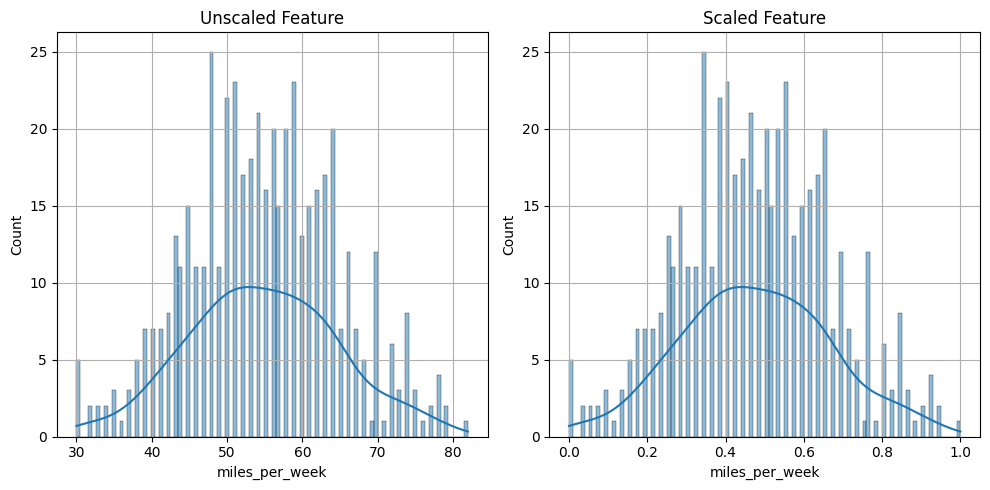

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.grid(True)
sns.histplot(x="miles_per_week", data=df, kde=True, bins=100, ax=axs[0])
axs[0].set_title("Unscaled Feature")

sns.histplot(x="miles_per_week", data=X, kde=True, bins=100, ax=axs[1])
axs[1].set_title("Scaled Feature")

[ax.grid(True) for ax in axs]
plt.tight_layout()
plt.show()

<Axes: xlabel='miles_per_week', ylabel='farthest_run'>

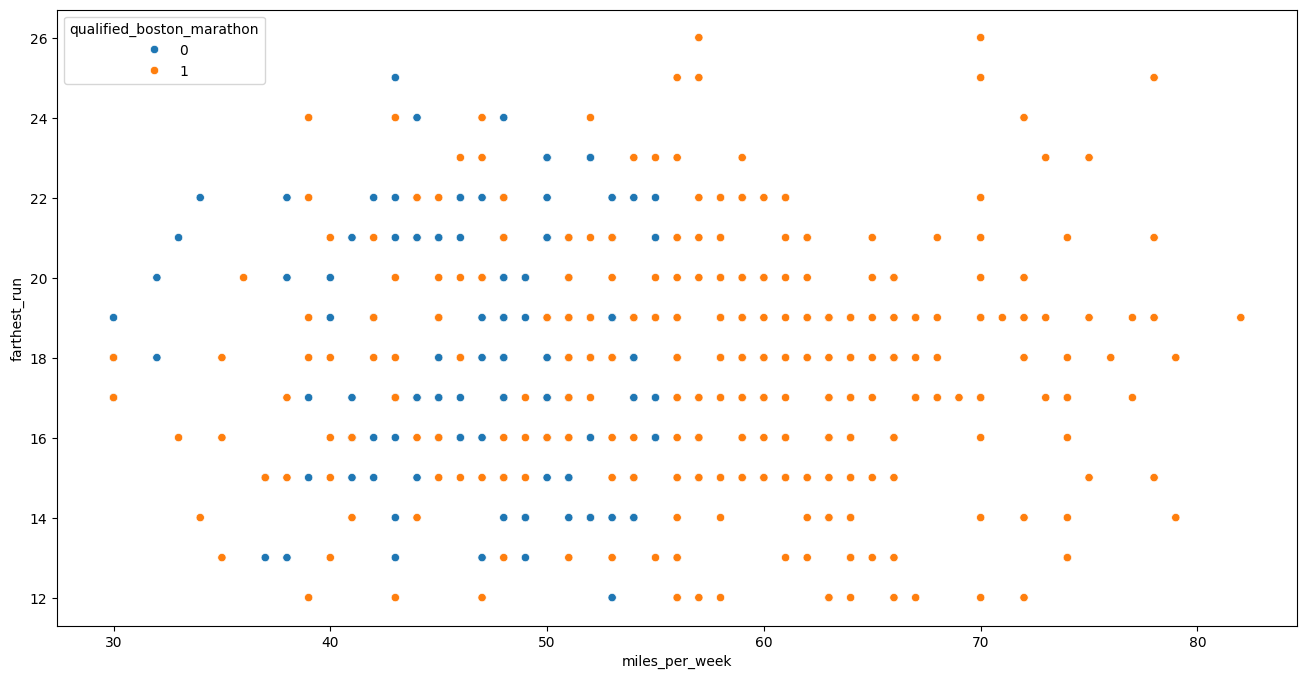

In [63]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    y="farthest_run", x="miles_per_week", data=df, hue="qualified_boston_marathon"
)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

In [66]:
print(X_train.shape, y_train.shape)

(400, 2) (400,)


In [68]:
from sklearn.svm import SVC

In [69]:
model = SVC()

In [71]:
model.fit(X_train, y_train)

SVC()

In [76]:
model.score(X_test, y_test)

0.79

In [77]:
 giutmodel.score(X_train, y_train)

0.775